## Import das bibliotecas

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

## Conexão com o google drive para leitura do dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leitura e tratamento da base de dados

In [3]:
# Leitura da aba Base do dataset
house = pd.read_excel('/content/drive/My Drive/bases_regressao.xlsx', sheet_name='BASE')

In [4]:
# Leitura da aba Previsão do dataset
house_pred = pd.read_excel('/content/drive/My Drive/bases_regressao.xlsx', sheet_name='PREVISAO')

In [5]:
print('Número de atributos originais')
print(house.shape)

Número de atributos originais
(1218, 6)


In [53]:
# Leitura de todas as linhas e todas as colunas exceto a ultima
X = house.iloc[:, 0:(house.shape[1] - 1)]

# Leitura de todas as linhas e da ultima coluna
y = house.iloc[:, (house.shape[1] - 1)]

# Regressão Linear

In [7]:
# aplicação do MinMaxScaler para normalização dos dados da variável X
mi_scaler = MinMaxScaler().fit(X)
X = mi_scaler.transform(X)

In [8]:
# Divindo em bases de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

In [9]:
# aplicando regressão linear
lr = LinearRegression().fit(X_train, y_train)

# imprimindo os coeficientes R^2 para avaliar a performance do modelo
print('Regressão Linear (Original)')
print('Coeficiênte R^2 na base de treinamento: {:.2f}'.format(lr.score(X_train, y_train)))
print('Coeficiente R^2 na base de teste: {:.2f}'.format(lr.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lr.coef_ != 0)))

# imprimindo os pesos do coeficiente e intercept do modelo 
print('Descrição do modelo: ')
s = ['{0:0.2f}'.format(v) for v in lr.coef_]
print('w: {} b: {:.2f}'.format(s, lr.intercept_))

Regressão Linear (Original)
Coeficiênte R^2 na base de treinamento: 0.82
Coeficiente R^2 na base de teste: 0.84
Número de atributos usados: 5
Descrição do modelo: 
w: ['26.94', '-45.85', '0.38', '110.03', '22.62'] b: 141.61


In [10]:
# criando o objeto aquecimento oleo na aba de predição e aplicando o predict
house_pred['Aquecimento_oleo'] = lr.predict(mi_scaler.transform(house_pred))
house_pred['Aquecimento_oleo'].sum()

8504297.902800389

## Analise estatistica das saidas de treino e teste

In [11]:
house.describe()

,Isolamento,Temperatura,Num_ocupantes,Idade_media,Tamanho_casa,Aquecimento_oleo
count,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00
mean,6.21,65.08,3.11,42.71,4.65,197.39
std,2.77,16.93,1.69,15.05,2.32,56.25
min,2.00,38.00,1.00,15.10,1.00,114.00
25%,4.00,49.00,2.00,29.70,3.00,148.25
50%,6.00,60.00,3.00,42.90,5.00,185.00
75%,9.00,81.00,4.00,55.60,7.00,253.00
max,10.00,90.00,10.00,72.20,8.00,301.00


In [12]:
house_pred.describe()

,Isolamento,Temperatura,Num_ocupantes,Idade_media,Tamanho_casa,Aquecimento_oleo
count,42650.00,42650.00,42650.00,42650.00,42650.00,42650.00
mean,5.99,63.96,5.49,44.04,4.50,199.40
std,2.58,15.31,2.87,16.74,2.29,36.71
min,2.00,38.00,1.00,15.00,1.00,99.19
25%,4.00,51.00,3.00,29.50,3.00,171.12
50%,6.00,64.00,5.00,44.10,4.00,199.57
75%,8.00,77.00,8.00,58.60,6.00,227.62
max,10.00,90.00,10.00,73.00,8.00,301.25


## Polynomial Features

In [51]:
# aplicando polynomial features adicionando preditore extrar para potencializar o modelo
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [52]:
# fazendo um print do dataset agora com mais features
print('Polynomial Features (atributos redundantes):')
print(X.shape)


Polynomial Features (atributos redundantes):
(24360, 2)


In [23]:
# dividindo o modelo entre bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
# aplicando regressão linear
lr = LinearRegression().fit(X_train, y_train)

# imprimindo a acurácia do modelo após aplicar polynomialfeatures
print('Regressão Linear (com atributos redundantes)')
print('Acurácia na base de treinamento: {:.2f}'.format(lr.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lr.score(X_test, y_test)))

Regressão Linear (com atributos redundantes)
Acurácia na base de treinamento: 0.83
Acurácia na base de teste: 0.88


# Aplicação do método Ridge

In [25]:
# treino do modelo com o metodo ridge
ridge = Ridge().fit(X_train, y_train)

# imprimindo a acurácia do modelo com ridge - alpha = 1
print('Ridge alpha=1')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge.score(X_test, y_test)))

Ridge alpha=1
Acurácia na base de treinamento: 0.83
Acurácia na base de teste: 0.88


In [26]:
# treino do modelo com o metodo ridge
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# imprimindo a acurácia do modelo com ridge - alpha = 0.1
print('Ridge alpha=0.1')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge.score(X_test, y_test)))

Ridge alpha=0.1
Acurácia na base de treinamento: 0.83
Acurácia na base de teste: 0.88


In [27]:
# treino do modelo com o metodo ridge
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

# imprimindo a acurácia do modelo com ridge - alpha = 10
print('Ridge alpha=10')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge.score(X_test, y_test)))

Ridge alpha=10
Acurácia na base de treinamento: 0.83
Acurácia na base de teste: 0.88


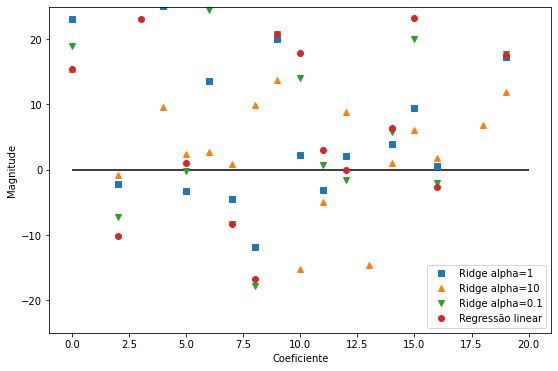

In [28]:
# visualizando os ridges com diferentes valores de alpha e regressão linear
plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label='Regressão linear')
plt.xlabel('Coeficiente')
plt.ylabel('Magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Aplicação do método Lasso

In [29]:
# criando um objeto com o metodo Lasso e treinando o modelo
lasso = Lasso().fit(X_train, y_train)

# imprimindo a acurácia do modelo com lasso - alpha = 1
print('Lasso alpha=1')
print('Acurácia na base de treinamento: {:2f}'.format(lasso.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Número de atributos usados: {}'.format(np.sum(lasso.coef_ != 0)))

Lasso alpha=1
Acurácia na base de treinamento: 0.816822
Acurácia na base de teste: 0.87
Número de atributos usados: 6


In [54]:
# criando um objeto com o metodo Lasso e treinando o modelo
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

# imprimindo a acurácia do modelo com lasso - alpha = 0.01
print('Lasso alpha=0.01')
print('Acurácia na base de treinamento: {:2f}'.format(lasso.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Número de atributos usados: {}'.format(np.sum(lasso.coef_ != 0)))

Lasso alpha=0.01
Acurácia na base de treinamento: 0.816822
Acurácia na base de teste: 0.87
Número de atributos usados: 6


In [55]:
# criando um objeto com o metodo Lasso e treinando o modelo
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

# imprimindo a acurácia do modelo com lasso - alpha = 0.0001
print('Lasso alpha=0.0001')
print('Acurácia na base de treinamento: {:2f}'.format(lasso.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Número de atributos usados: {}'.format(np.sum(lasso.coef_ != 0)))

Lasso alpha=0.0001
Acurácia na base de treinamento: 0.816822
Acurácia na base de teste: 0.87
Número de atributos usados: 6


## Comparação do Ridge com o Lasso

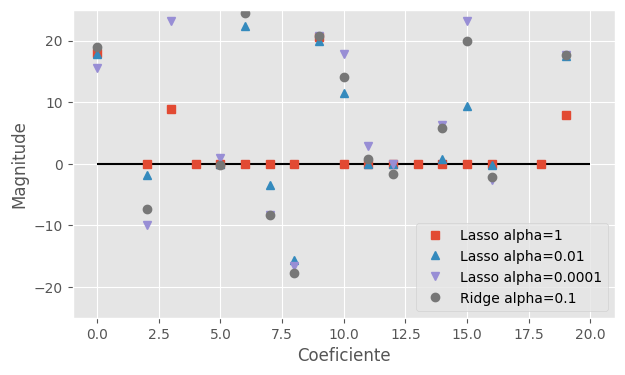

In [49]:
# print comparando a performance do modelo com diferentes valores de alpha no lasso  versus ridge com alpha=0.1
plt.figure(figsize=(7, 4))
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Interpretação dos resultados

1. Considerando os pesos dos atributos: w: ['26.94', '-45.85', '0.38', '110.03', '22.62'], temos todos os atributos como relevantes exceto o atributo número de ocupantes que tem peso 0.38.
2. O isolamento, número de ocupantes, idade média e tamanho da casa são diretamente proprocionais relacionados entre eles, que são inversamente proprocionais relacionados com a temperatura.
3. O atributo numero de ocupantes não considero relevante para o modelo dado seu valor próximo de 0.